OBJECT DETECTION SYSTEM

⏳ Loading pre-trained model (MobileNetV2)...
Model loaded successfully!
   Can detect 1000+ objects including: person, cat, dog, car, food, etc.

 Loading image: man.jpg
Image loaded and preprocessed

 Detecting objects...

 DETECTION RESULTS

 PRIMARY DETECTION: MILITARY UNIFORM DETECTED
   Confidence: 5.89%

Top 5 Detected Objects:
----------------------------------------------------------------------
○ 1. Military Uniform                5.89%                                                    
○ 2. Breakwater                      5.47%                                                    
○ 3. Sunglass                        4.62%                                                    
○ 4. Chainlink Fence                 4.31%                                                    
○ 5. Suit                            4.14%                                                    

 Creating visualization...
Result saved to: detected_military_uniform.png


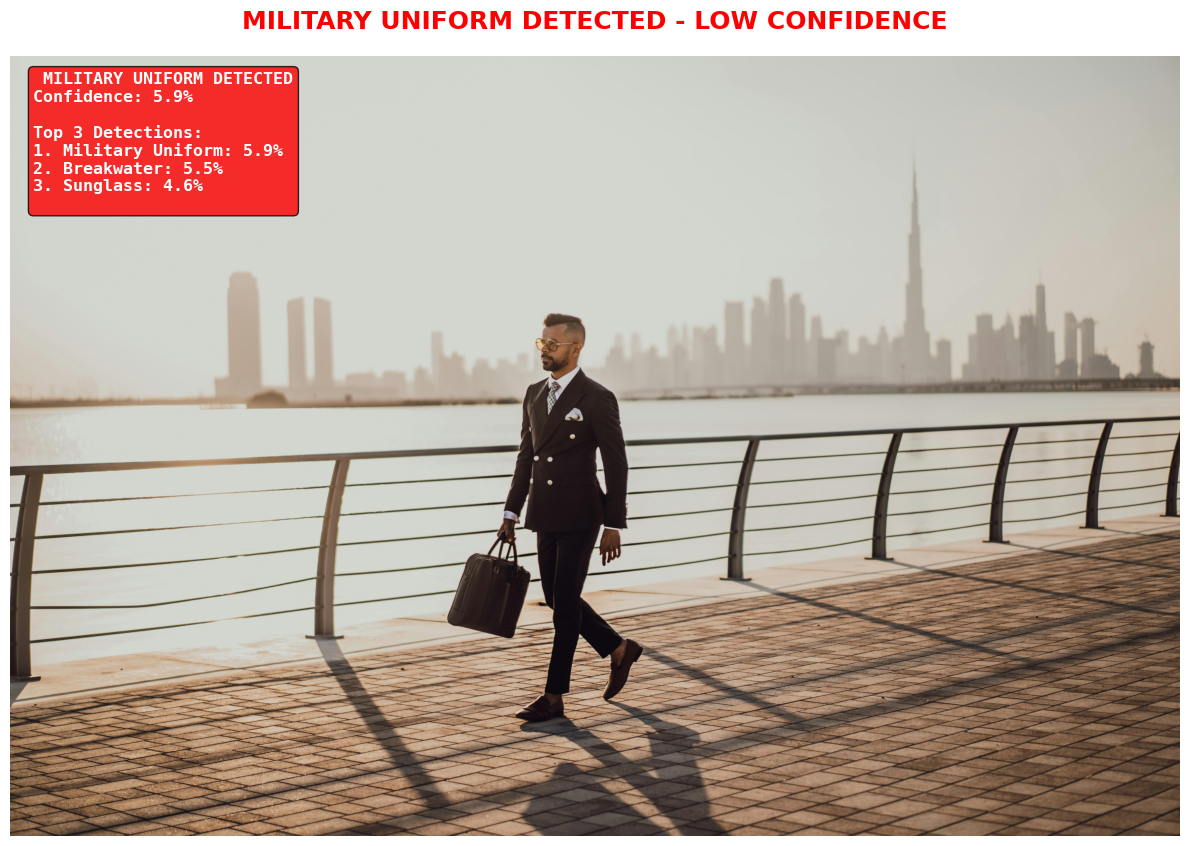


DETECTION COMPLETE!

 SUMMARY:
   Main Detection: military uniform
   Confidence: 5.89%
   Image: man.jpg
   Output: detected_military_uniform.png



In [2]:
# object_detector.py
"""
Simple Object Detection System
Detects objects in images and outputs readable class names like "man detected", "cat detected"
Uses pre-trained MobileNetV2 model (no training required!)
"""

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from PIL import Image
import os

# --- CONFIGURATION ---
IMG_PATH = "man.jpg"  # Change this to your image path
IMG_SIZE = (224, 224)        # Required size for MobileNetV2

print("="*70)
print("OBJECT DETECTION SYSTEM")
print("="*70)

# --- LOAD PRE-TRAINED MODEL ---
print("\n⏳ Loading pre-trained model (MobileNetV2)...")
try:
    model = MobileNetV2(weights='imagenet', include_top=True)
    print("Model loaded successfully!")
    print("   Can detect 1000+ objects including: person, cat, dog, car, food, etc.")
except Exception as e:
    print(f"Error loading model: {e}")
    raise SystemExit

# --- LOAD AND PREPROCESS IMAGE ---
print(f"\n Loading image: {IMG_PATH}")
try:
    if not os.path.exists(IMG_PATH):
        print(f" Error: Image '{IMG_PATH}' not found!")
        print("   Please update IMG_PATH to point to your image.")
        raise SystemExit
    
    # Load image
    img = image.load_img(IMG_PATH, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    print("Image loaded and preprocessed")
except Exception as e:
    print(f"Error loading image: {e}")
    raise SystemExit

# --- PREDICT ---
print("\n Detecting objects...")
try:
    predictions = model.predict(img_array, verbose=0)
    
    # Decode predictions to readable labels
    decoded = decode_predictions(predictions, top=5)[0]
    
    print("\n" + "="*70)
    print(" DETECTION RESULTS")
    print("="*70)
    
    # Main detection (highest confidence)
    main_class = decoded[0][1].replace('_', ' ')
    main_confidence = decoded[0][2]
    
    print(f"\n PRIMARY DETECTION: {main_class.upper()} DETECTED")
    print(f"   Confidence: {main_confidence:.2%}")
    
    # Show top 5 detections
    print(f"\nTop 5 Detected Objects:")
    print("-"*70)
    
    for i, (imagenet_id, label, score) in enumerate(decoded, 1):
        # Clean up label (remove underscores, capitalize)
        clean_label = label.replace('_', ' ').title()
        
        # Create progress bar
        bar_length = int(score * 50)
        bar = " " * bar_length + " " * (50 - bar_length)
        
        # Status emoji based on confidence
        if score > 0.5:
            emoji = ""
        elif score > 0.2:
            emoji = "✓"
        else:
            emoji = "○"
        
        print(f"{emoji} {i}. {clean_label:30s} {score:6.2%}  {bar}")
    
except Exception as e:
    print(f" Error during prediction: {e}")
    raise SystemExit

# --- VISUALIZE RESULTS ---
print("\n Creating visualization...")
try:
    # Load original image for display
    display_img = Image.open(IMG_PATH)
    
    # Create figure with results
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    ax.imshow(display_img)
    
    # Create result text
    result_text = f" {main_class.upper()} DETECTED\n"
    result_text += f"Confidence: {main_confidence:.1%}\n\n"
    result_text += "Top 3 Detections:\n"
    for i, (_, label, score) in enumerate(decoded[:3], 1):
        clean = label.replace('_', ' ').title()
        result_text += f"{i}. {clean}: {score:.1%}\n"
    
    # Color based on confidence
    if main_confidence > 0.7:
        box_color = 'green'
        status = "HIGH CONFIDENCE"
    elif main_confidence > 0.4:
        box_color = 'orange'
        status = "MEDIUM CONFIDENCE"
    else:
        box_color = 'red'
        status = "LOW CONFIDENCE"
    
    # Add text box with results
    props = dict(boxstyle='round', facecolor=box_color, alpha=0.8)
    ax.text(0.02, 0.98, result_text, transform=ax.transAxes, 
            fontsize=12, verticalalignment='top', bbox=props,
            color='white', fontweight='bold', family='monospace')
    
    # Title
    ax.set_title(f"{main_class.upper()} DETECTED - {status}", 
                 fontsize=18, fontweight='bold', color=box_color, pad=20)
    ax.axis('off')
    
    plt.tight_layout()
    
    # Save result
    output_path = f"detected_{main_class.replace(' ', '_')}.png"
    plt.savefig(output_path, bbox_inches='tight', dpi=150, facecolor='white')
    print(f"Result saved to: {output_path}")
    
    plt.show()
    
except Exception as e:
    print(f"Warning: Could not create visualization: {e}")

print("\n" + "="*70)
print("DETECTION COMPLETE!")
print("="*70)

# --- SUMMARY ---
print(f"\n SUMMARY:")
print(f"   Main Detection: {main_class}")
print(f"   Confidence: {main_confidence:.2%}")
print(f"   Image: {IMG_PATH}")
print(f"   Output: {output_path}")
print()

# object_detector.py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from PIL import Image
import os
# --- CONFIGURATION ---
IMG_PATH = "man.jpg"  # Change this to your image path
IMG_SIZE = (224, 224)        # Required size for MobileNetV2
print("="*70)
print("OBJECT DETECTION SYSTEM")
print("="*70)
# --- LOAD PRE-TRAINED MODEL ---
print("\n⏳ Loading pre-trained model (MobileNetV2)...")
try:
    model = MobileNetV2(weights='imagenet', include_top=True)
    print("Model loaded successfully!")
    print("   Can detect 1000+ objects including: person, cat, dog, car, food, etc.")
except Exception as e:
    print(f"Error loading model: {e}")
    raise SystemExit
# --- LOAD AND PREPROCESS IMAGE ---
print(f"\n Loading image: {IMG_PATH}")
try:
    if not os.path.exists(IMG_PATH):
        print(f" Error: Image '{IMG_PATH}' not found!")
        print("   Please update IMG_PATH to point to your image.")
        raise SystemExit
    # Load image
    img = image.load_img(IMG_PATH, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    print("Image loaded and preprocessed")
except Exception as e:
    print(f"Error loading image: {e}")
    raise SystemExit
# --- PREDICT ---
print("\n Detecting objects...")
try:
    predictions = model.predict(img_array, verbose=0)
    # Decode predictions to readable labels
    decoded = decode_predictions(predictions, top=5)[0]
    print("\n" + "="*70)
    print(" DETECTION RESULTS")
    print("="*70)
    # Main detection (highest confidence)
    main_class = decoded[0][1].replace('_', ' ')
    main_confidence = decoded[0][2]
    print(f"\n PRIMARY DETECTION: {main_class.upper()} DETECTED")
    print(f"   Confidence: {main_confidence:.2%}")
    # Show top 5 detections
    print(f"\nTop 5 Detected Objects:")
    print("-"*70)
    for i, (imagenet_id, label, score) in enumerate(decoded, 1):
        # Clean up label (remove underscores, capitalize)
        clean_label = label.replace('_', ' ').title()  
        # Create progress bar
        bar_length = int(score * 50)
        bar = " " * bar_length + " " * (50 - bar_length)
        # Status emoji based on confidence
        if score > 0.5:
            emoji = ""
        elif score > 0.2:
            emoji = "✓"
        else:
            emoji = "○"
        print(f"{emoji} {i}. {clean_label:30s} {score:6.2%}  {bar}")
except Exception as e:
    print(f" Error during prediction: {e}")
    raise SystemExit
# --- VISUALIZE RESULTS ---
print("\n Creating visualization...")
try:
    # Load original image for display
    display_img = Image.open(IMG_PATH)
    # Create figure with results
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    ax.imshow(display_img)
    # Create result text
    result_text = f" {main_class.upper()} DETECTED\n"
    result_text += f"Confidence: {main_confidence:.1%}\n\n"
    result_text += "Top 3 Detections:\n"
    for i, (_, label, score) in enumerate(decoded[:3], 1):
        clean = label.replace('_', ' ').title()
        result_text += f"{i}. {clean}: {score:.1%}\n"
    # Color based on confidence
    if main_confidence > 0.7:
        box_color = 'green'
        status = "HIGH CONFIDENCE"
    elif main_confidence > 0.4:
        box_color = 'orange'
        status = "MEDIUM CONFIDENCE"
    else:
        box_color = 'red'
        status = "LOW CONFIDENCE"
    # Add text box with results
    props = dict(boxstyle='round', facecolor=box_color, alpha=0.8)
    ax.text(0.02, 0.98, result_text, transform=ax.transAxes, 
            fontsize=12, verticalalignment='top', bbox=props,
            color='white', fontweight='bold', family='monospace')
    # Title
    ax.set_title(f"{main_class.upper()} DETECTED - {status}", 
                 fontsize=18, fontweight='bold', color=box_color, pad=20)
    ax.axis('off')
    plt.tight_layout()
    # Save result
    output_path = f"detected_{main_class.replace(' ', '_')}.png"
    plt.savefig(output_path, bbox_inches='tight', dpi=150, facecolor='white')
    print(f"Result saved to: {output_path}")
    plt.show()
except Exception as e:
    print(f"Warning: Could not create visualization: {e}")
print("\n" + "="*70)
print("DETECTION COMPLETE!")
print("="*70)
# --- SUMMARY ---
print(f"\n SUMMARY:")
print(f"   Main Detection: {main_class}")
print(f"   Confidence: {main_confidence:.2%}")
print(f"   Image: {IMG_PATH}")
print(f"   Output: {output_path}")
print()
